<a href="https://colab.research.google.com/github/WankhedeAmey/ML/blob/main/MDS_on_crabs_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from google.colab import files
import io

from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
files.upload()

Saving crabs.csv to crabs.csv


{'crabs.csv': b'sp,sex,index,FL,RW,CL,CW,BD\nB,M,1,8.1,6.7,16.1,19,7\nB,M,2,8.8,7.7,18.1,20.8,7.4\nB,M,3,9.2,7.8,19,22.4,7.7\nB,M,4,9.6,7.9,20.1,23.1,8.2\nB,M,5,9.8,8,20.3,23,8.2\nB,M,6,10.8,9,23,26.5,9.8\nB,M,7,11.1,9.9,23.8,27.1,9.8\nB,M,8,11.6,9.1,24.5,28.4,10.4\nB,M,9,11.8,9.6,24.2,27.8,9.7\nB,M,10,11.8,10.5,25.2,29.3,10.3\nB,M,11,12.2,10.8,27.3,31.6,10.9\nB,M,12,12.3,11,26.8,31.5,11.4\nB,M,13,12.6,10,27.7,31.7,11.4\nB,M,14,12.8,10.2,27.2,31.8,10.9\nB,M,15,12.8,10.9,27.4,31.5,11\nB,M,16,12.9,11,26.8,30.9,11.4\nB,M,17,13.1,10.6,28.2,32.3,11\nB,M,18,13.1,10.9,28.3,32.4,11.2\nB,M,19,13.3,11.1,27.8,32.3,11.3\nB,M,20,13.9,11.1,29.2,33.3,12.1\nB,M,21,14.3,11.6,31.3,35.5,12.7\nB,M,22,14.6,11.3,31.9,36.4,13.7\nB,M,23,15,10.9,31.4,36.4,13.2\nB,M,24,15,11.5,32.4,37,13.4\nB,M,25,15,11.9,32.5,37.2,13.6\nB,M,26,15.2,12.1,32.3,36.7,13.6\nB,M,27,15.4,11.8,33,37.5,13.6\nB,M,28,15.7,12.6,35.8,40.3,14.5\nB,M,29,15.9,12.7,34,38.9,14.2\nB,M,30,16.1,11.6,33.8,39,14.4\nB,M,31,16.1,12.8,34.9,40.7,15.7\nB

In [6]:
# read data and process it
crabs_data = pd.read_csv('crabs.csv')

# Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal Lobe','RW':'Rear Width','CL':'Carapace Midline',
                                        'CW':'Maximum Width','BD':'Body Depth'})

crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

# Separate the 200 crabs into four classes, given by the 2x2 configurations for sex (male/female) and species (blue/orange).
crabs_data['class'] = crabs_data.species + crabs_data.sex
rel_feat = ['Frontal Lobe','Rear Width','Carapace Midline','Maximum Width','Body Depth'] #relevant features


# MultiDimensional Scaling

This model projects the data to a space of fewer dimensions trying to preserve the distances in the original space using a linear transformation using least squares.

In [7]:
# Scale the data
min_max_crabs = crabs_data.copy()
min_max_crabs[rel_feat] = MinMaxScaler().fit_transform(crabs_data[rel_feat])

The SMACOF (Scaling by MAjorizing a COmplicated Function) algorithm is a multidimensional scaling algorithm which minimizes an objective function (the stress) using a majorization technique. Stress majorization, also known as the Guttman Transform, guarantees a monotone convergence of stress, and is more powerful than traditional techniques such as gradient descent.

MDS is stochastic algorithm, meaning output will be different for different runs(here, beacuse of n_init)

In [20]:
# Apply the MDS for 2D space

mds_2d = MDS(n_components=2, metric=True, n_init=15)
crabs_mds_2d = mds_2d.fit_transform(min_max_crabs[rel_feat])

print('MSE: ', mds_2d.stress_) #mean square error

min_max_crabs[['MDS1', 'MDS2']] = crabs_mds_2d

min_max_crabs.head()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MSE:  3.8350383560096017


,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,MDS1,MDS2
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,-0.723161,-0.742723
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,-0.682936,-0.624818
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,-0.632822,-0.597795
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,-0.605957,-0.549425
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,-0.597412,-0.543340


## 2D plot

<Axes: xlabel='MDS1', ylabel='MDS2'>

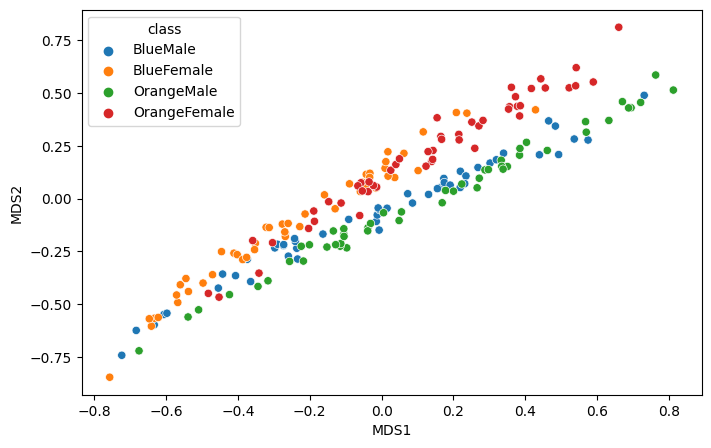

In [22]:
fig=plt.figure(figsize=(8, 5))
sns.scatterplot(x='MDS1', y='MDS2', hue='class', data=min_max_crabs)

In [24]:
# Apply MDS for 3D space
mds_3d = MDS(n_components=3, metric=True, n_init=15)
crabs_mds_3d = mds_3d.fit_transform(min_max_crabs[rel_feat])

print('MSE: ', mds_3d.stress_)

min_max_crabs[['MDS1', 'MDS2', 'MDS3']] = crabs_mds_3d

min_max_crabs.head()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MSE:  2.0397771234527937


,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,MDS1,MDS2,MDS3
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,0.714317,0.655792,0.357875
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,0.635718,0.618184,0.256992
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,0.588504,0.597932,0.226746
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,0.534657,0.559286,0.261024
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,0.535971,0.551292,0.241343


### 3D Plot

<Figure size 800x500 with 0 Axes>

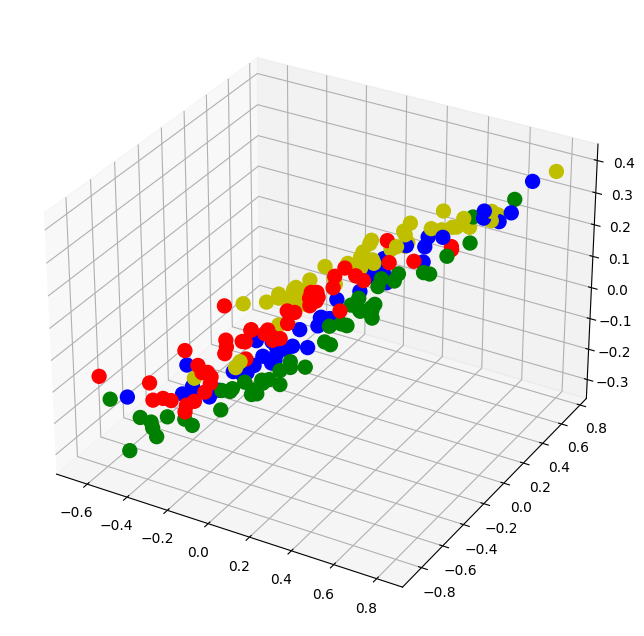

In [25]:
fig=plt.figure(figsize=(8, 5))

colors_crabs = {'BlueFemale': 'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}

fig = plt.figure(figsize=(8,8))
# Add new axis
ax = fig.add_subplot(111,projection='3d')  # Z Axis

plt.scatter(min_max_crabs.MDS1,min_max_crabs.MDS2,zs=min_max_crabs.MDS3,depthshade=False,
            c = min_max_crabs['class'].apply(lambda x: colors_crabs[x]),s=100)

In [27]:
# Using plotly for graph

fig = px.scatter_3d(min_max_crabs, x='MDS1', y='MDS2', z='MDS3', color='class')
fig.show()

## Summary for MDS

Multidimensional Scaling (MDS) is a statistical technique used for analyzing the similarity or dissimilarity between pairs of objects or observations. It visualizes the level of similarity/dissimilarity between these objects by representing them in a lower-dimensional space while preserving their pairwise relationships as much as possible.

Key points about Multidimensional Scaling (MDS):

1. **Objective**:
   - The primary goal of MDS is to represent objects in a lower-dimensional space (typically 2D or 3D) in such a way that the pairwise distances or dissimilarities between objects are maintained as accurately as possible.

2. **Similarity/Dissimilarity Matrix**:
   - MDS requires a similarity or dissimilarity matrix as input, representing the distances or dissimilarities between pairs of objects.
   - This matrix can be based on various metrics like Euclidean distance, correlation, or other dissimilarity measures.

3. **Projection into Lower-Dimensional Space**:
   - MDS constructs a map or visualization of the objects in a reduced-dimensional space (e.g., 2D or 3D) while aiming to maintain the relationships between objects from the original higher-dimensional space.
   - The algorithm finds a configuration of points in the lower-dimensional space that best approximates the given similarity/dissimilarity matrix.

4. **Stress Function**:
   - MDS uses a criterion called stress or loss function, which quantifies how well the lower-dimensional representation preserves the pairwise relationships from the original data.
   - The goal is to minimize this stress function, indicating a better fit of the lower-dimensional representation to the original dissimilarities.

5. **Applications**:
   - MDS is commonly used in various fields such as psychology, sociology, marketing, biology, and geography.
   - It helps in visualizing and understanding relationships or proximities between objects, clustering analysis, and data exploration.

6. **Types of MDS**:
   - There are different types of MDS, including metric MDS (which uses actual distances) and non-metric MDS (which uses rank orders of distances).

In summary, Multidimensional Scaling is a technique used for visualizing and understanding relationships between objects by projecting them into a lower-dimensional space while preserving their pairwise similarities or dissimilarities as much as possible. It's a valuable tool for exploratory data analysis and understanding complex datasets.